# hyperparameters Tunning for logestic Regression

- model- parameters tunning- best paramter- den we use that best parameter model

Hyperparameter tuning consists of finding a set of optimal hyperparameter values for a learning algorithm while applying this optimized algorithm to any data set. That combination of hyperparameters maximizes the model's performance, minimizing a predefined loss function to produce better results with fewer errors.


- Grid Serach and Random Serach 

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
model=LogisticRegression()

In [ ]:
1. Penality:["none","l1","l2","elasticnet"]
2. tol:[0.0001]#default value-- Stopping criteria for GD
3. C:[default_value=1.0] # Inverse of Shrinkage Factor(The bigger the C value the weak Regularisation will be)
4. Solver:["liblinear", "lbfgs", "newton-cg","sag","saga"] # we use GD in logestic, bit we also use other solvers with GD to optmise the LG
5. max_iterations: The number of epocs for the algo to converge 
    

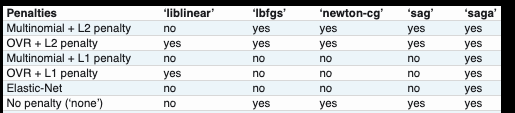

In [4]:
import seaborn as sns
import pandas as pd
import numpy as np

In [5]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df=df[df['species']!='setosa']
df

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [9]:
df['species'].unique()

array(['versicolor', 'virginica'], dtype=object)

In [10]:
df['species']=df['species'].map({'versicolor':0,'virginica':1})

In [11]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


In [12]:
### Split dataset into independent and dependent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [15]:
from sklearn.model_selection import GridSearchCV

In [19]:
parameter={
    'penalty':['l1','l2','elasticnet'],
    'C':[1,2,3,4,5],
    'max_iter':[100,200,300]    
}

In [20]:
parameter

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [1, 2, 3, 4, 5],
 'max_iter': [100, 200, 300]}

In [22]:
Classifer_logestic=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5,n_jobs=-1,verbose=True)

In [23]:
Classifer_logestic.fit(X_train,y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


C:\Users\Ashish\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 225.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Ashish\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ashish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ashish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5], 'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy', verbose=True)

In [24]:
Classifer_logestic.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}

In [25]:
Classifer_logestic.best_score_

0.9733333333333334

In [27]:
##prediction
y_pred=Classifer_logestic.predict(X_test)

## accuracy score
from sklearn.metrics import accuracy_score,classification_report

accuracy_score(y_pred,y_test)

print(classification_report(y_pred,y_test))